In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pg_data.csv")
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Jaylen Adams,5,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
1,Cole Anthony,5,20,ORL,25,17,26.7,4.0,10.8,0.375,...,14.8,22.0,-0.6,0.6,0.0,0.000,-3.0,-1.1,-4.1,-0.4
2,Ryan Arcidiacono,5,26,CHI,11,0,9.7,0.8,2.2,0.375,...,7.1,11.2,0.2,0.1,0.3,0.119,-2.5,0.9,-1.6,0.0
3,D.J. Augustin,5,33,MIL,27,0,17.8,1.7,5.1,0.336,...,12.5,15.3,0.6,0.3,0.8,0.083,-0.5,-1.6,-2.2,0.0
4,LaMelo Ball,5,19,CHO,28,8,27.7,5.4,12.4,0.437,...,16.5,24.8,0.8,1.0,1.8,0.113,1.8,1.0,2.8,0.9


In [3]:
#check if there are any duplicates
temp = df.Player.value_counts()
temp[temp>1]

Dennis Smith Jr.    6
Derrick Rose        6
Name: Player, dtype: int64

In [4]:
#average out the repeated values
c_df = df.groupby('Player').mean().reset_index()

In [5]:
temp = c_df.Player.value_counts()
temp[temp>1]

Series([], Name: Player, dtype: int64)

In [6]:
c_df.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Aaron Holiday,5.0,24.0,29.0,6.0,19.9,2.8,7.6,0.370,1.1,...,9.0,19.2,-0.5,0.3,-0.1,-0.012,-4.1,-1.8,-5.9,-0.6
1,Alex Caruso,5.0,26.0,22.0,0.0,18.7,2.0,4.4,0.464,1.0,...,19.6,13.4,0.3,0.8,1.0,0.122,-1.5,2.2,0.7,0.3
2,Ashton Hagans,5.0,21.0,2.0,0.0,2.0,0.0,0.0,0.000,0.0,...,100.0,10.5,0.0,0.0,0.0,-0.352,-13.8,-7.9,-21.7,0.0
3,Ben Simmons,5.0,24.0,25.0,25.0,33.4,5.8,10.4,0.562,0.0,...,20.9,20.3,1.5,1.3,2.8,0.163,1.6,2.6,4.2,1.3
4,Brad Wanamaker,5.0,31.0,29.0,0.0,16.0,1.3,4.0,0.336,0.3,...,15.1,14.5,0.0,0.6,0.6,0.059,-4.4,0.8,-3.7,-0.2


### Prep data

In [7]:
#drop the team column
n_df = c_df.drop(['Pos','Age'],axis = 1)
#drop name column
n_df = n_df.loc[:,'GS':'VORP']

In [8]:
n_df.columns

Index(['GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [9]:
#select the necessary data to perform analysis
km_df = n_df[['PTS','AST','TRB','BLK','STL','TOV','USG%','BPM']]
X = km_df
X.head()

,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM
0,7.4,1.8,1.3,0.1,0.5,0.8,19.2,-5.9
1,5.5,2.3,2.4,0.2,1.0,1.1,13.4,0.7
2,0.0,0.0,0.0,0.0,0.0,0.5,10.5,-21.7
3,15.2,8.0,8.3,0.8,1.7,3.4,20.3,4.2
4,4.3,2.7,1.8,0.1,0.8,0.8,14.5,-3.7


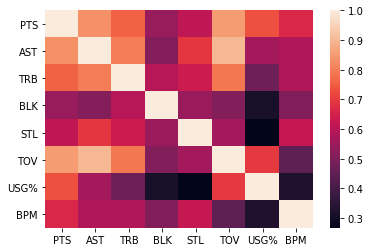

In [10]:
sns.heatmap(X.corr())

### PCA 

In [11]:
from sklearn.preprocessing import StandardScaler
stan_scale = StandardScaler()
stan_scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

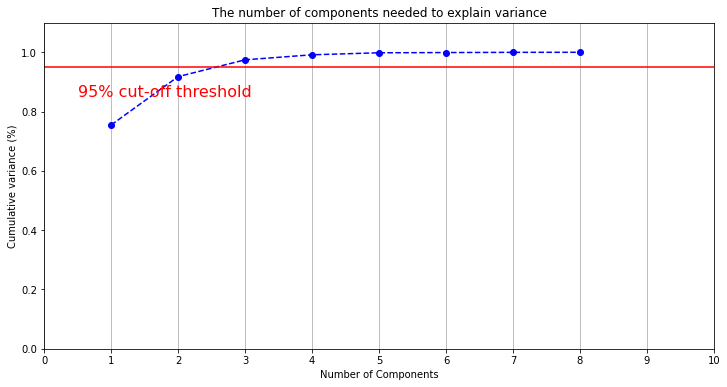

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,9,step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker = 'o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [13]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(X)
prin_df = pd.DataFrame(data = prin_comp, columns = ['PC1','PC2'])
prin_df.head()

,PC1,PC2
0,-4.602160,1.917449
1,-5.946410,-6.858057
2,-21.017560,7.997024
3,8.160540,-5.763662
4,-8.046133,-2.844899


### Perform Data Cleaning for the PCA


C:\Users\David\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\David\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


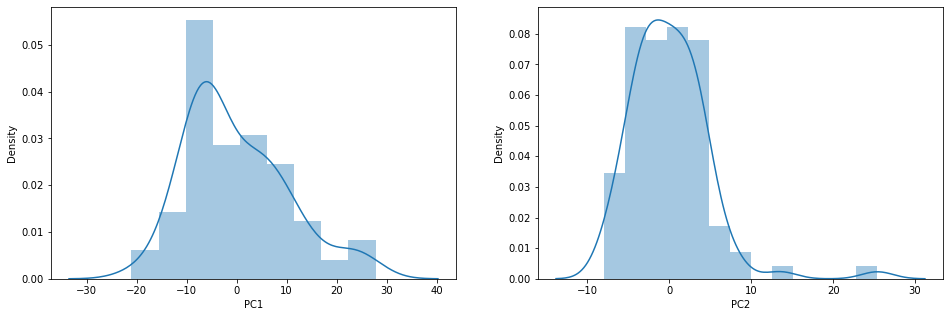

In [14]:
#visualize if theres any outlier in the data
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(prin_df['PC1'])
plt.subplot(1,2,2)
sns.distplot(prin_df['PC2'])
plt.show()

In [15]:
print(prin_df.describe())

                PC1           PC2
count  9.000000e+01  9.000000e+01
mean  -5.921189e-17  1.258253e-15
std    1.023695e+01  4.754881e+00
min   -2.101756e+01 -8.025546e+00
25%   -6.772230e+00 -3.271634e+00
50%   -3.047545e+00 -3.420433e-01
75%    6.590149e+00  2.534376e+00
max    2.779316e+01  2.540142e+01


### K-Mean Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
tots_within = []
for k in range(1,14):
    km = KMeans(max_iter = 300, random_state = 42, 
                init= 'random', n_clusters = k)
    km = km.fit(prin_df)
    tots_within.append(km.inertia_)


### Cluster Selection/Verification using Elbow Method

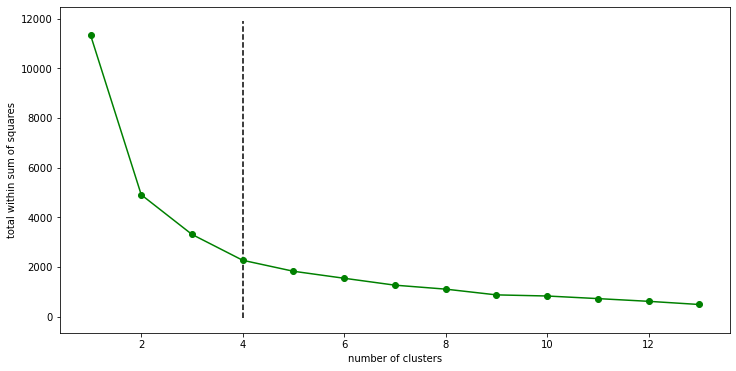

In [18]:
#locating elbow location using kneeLocator
from kneed import KneeLocator

kl = KneeLocator(range(1,14), 
                 tots_within, 
                 curve = "convex", 
                 direction = "decreasing")

#locating the elbow point
fig, ax = plt.subplots()
ax.plot(range(1,14), tots_within, 'go-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [19]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2, 1, 2, 2, 3,
       2, 3, 2, 2, 3, 0, 3, 3, 2, 2, 2, 3, 1, 2, 3, 2, 0, 0, 3, 3, 1, 3,
       3, 2, 0, 2, 2, 0, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 3, 2,
       3, 2])

### Append cluster to select df

In [20]:
X['y_kmeans'] = pd.Series(y_kmeans)
player = c_df["Player"]
kmc_df = X.join(player)
kmc_df.head()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM,y_kmeans,Player
0,7.4,1.8,1.3,0.1,0.5,0.8,19.2,-5.9,3,Aaron Holiday
1,5.5,2.3,2.4,0.2,1.0,1.1,13.4,0.7,3,Alex Caruso
2,0.0,0.0,0.0,0.0,0.0,0.5,10.5,-21.7,0,Ashton Hagans
3,15.2,8.0,8.3,0.8,1.7,3.4,20.3,4.2,2,Ben Simmons
4,4.3,2.7,1.8,0.1,0.8,0.8,14.5,-3.7,3,Brad Wanamaker


In [21]:
#filter out the different clusters
filt_zero = kmc_df[y_kmeans == 0]
filt_one = kmc_df[y_kmeans == 1]
filt_two = kmc_df[y_kmeans == 2]
filt_three = kmc_df[y_kmeans == 3]
#display the amount in each cluster
print("0: ",filt_zero.y_kmeans.count())
print("1: ", filt_one.y_kmeans.count())
print("2: " , filt_two.y_kmeans.count())
print("3: ", filt_three.y_kmeans.count())

0:  7
1:  12
2:  28
3:  43


In [22]:
filt_zero

,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM,y_kmeans,Player
2,0.0,0.0,0.0,0.0,0.0,0.5,10.5,-21.7,0,Ashton Hagans
27,1.6,1.1,0.7,0.0,0.1,0.6,22.2,-9.2,0,Frank Jackson
38,1.0,0.0,0.0,0.0,0.0,1.0,34.3,-23.5,0,Jared Harper
39,0.3,0.3,0.5,0.0,0.0,0.0,19.7,-20.9,0,Jaylen Adams
46,1.2,0.2,1.7,0.2,0.0,0.5,10.5,-11.4,0,Karim Mane
49,4.6,3.6,1.1,0.0,0.3,2.4,19.0,-13.6,0,Killian Hayes
80,1.3,2.3,1.3,0.0,0.3,1.0,14.2,-13.6,0,Tim Frazier


In [23]:
filt_one

,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM,y_kmeans,Player
14,19.3,5.1,2.6,0.5,1.1,2.7,29.4,0.4,1,D'Angelo Russell
16,29.8,7.7,4.4,0.3,1.1,3.1,32.2,6.3,1,Damian Lillard
18,23.2,6.8,3.3,0.5,1.2,3.1,30.6,1.2,1,De'Aaron Fox
34,18.8,8.3,3.1,0.3,0.9,3.2,28.7,-1.0,1,Ja Morant
42,20.4,6.3,3.7,0.7,1.0,3.5,30.7,0.9,1,John Wall
53,28.3,5.7,4.6,0.8,1.1,2.4,29.6,5.3,1,Kyrie Irving
55,25.7,7.9,8.2,0.5,1.0,3.7,31.4,7.2,1,LeBron James
58,29.1,9.4,8.6,0.7,1.0,4.2,36.0,7.8,1,Luka Doncic
60,21.6,6.6,4.8,0.3,1.3,2.1,26.2,2.0,1,Malcolm Brogdon
74,18.9,9.5,9.4,0.4,0.8,4.9,31.2,-1.8,1,Russell Westbrook


In [24]:
filt_two

,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM,y_kmeans,Player
3,15.20,8.0,8.30,0.80,1.7,3.4,20.300000,4.2,2,Ben Simmons
10,17.20,8.2,4.70,0.30,1.2,2.3,23.400000,3.9,2,Chris Paul
11,15.40,5.4,4.70,0.10,0.4,2.4,21.800000,-3.9,2,Coby White
12,11.00,3.8,4.40,0.40,0.7,2.0,22.000000,-4.1,2,Cole Anthony
17,15.90,5.3,2.20,0.10,1.0,2.5,23.100000,-2.0,2,Darius Garland
19,10.00,3.2,3.00,1.00,0.9,1.4,19.800000,1.2,2,De'Anthony Melton
20,15.10,5.0,7.20,0.10,1.6,1.7,23.200000,0.3,2,Dejounte Murray
22,13.85,4.1,2.05,0.35,1.2,1.9,28.733333,0.4,2,Derrick Rose
24,13.70,5.7,3.00,0.00,1.0,1.4,19.500000,-1.9,2,Devonte' Graham
25,12.20,3.6,3.80,0.20,0.6,1.9,23.200000,-3.4,2,Elfrid Payton


In [25]:
filt_three

,PTS,AST,TRB,BLK,STL,TOV,USG%,BPM,y_kmeans,Player
0,7.4,1.8,1.3,0.10,0.5,0.8,19.200000,-5.9,3,Aaron Holiday
1,5.5,2.3,2.4,0.20,1.0,1.1,13.400000,0.7,3,Alex Caruso
4,4.3,2.7,1.8,0.10,0.8,0.8,14.500000,-3.7,3,Brad Wanamaker
5,4.4,2.0,1.2,0.00,0.5,0.5,18.900000,-3.4,3,Brandon Goodwin
6,6.4,1.0,4.4,0.40,0.7,0.8,14.100000,-2.8,3,Bruce Brown
7,6.6,3.6,1.9,0.20,0.6,1.2,18.300000,0.2,3,Cameron Payne
8,2.2,1.0,0.7,0.20,0.0,0.2,11.200000,-4.0,3,Cassius Winston
9,3.2,2.3,0.9,0.30,0.3,0.7,21.000000,-4.4,3,Chris Chiozza
13,6.8,2.4,2.1,0.20,0.8,1.1,15.600000,-3.5,3,Cory Joseph
15,5.9,3.0,1.2,0.00,0.5,0.8,15.300000,-2.2,3,D.J. Augustin


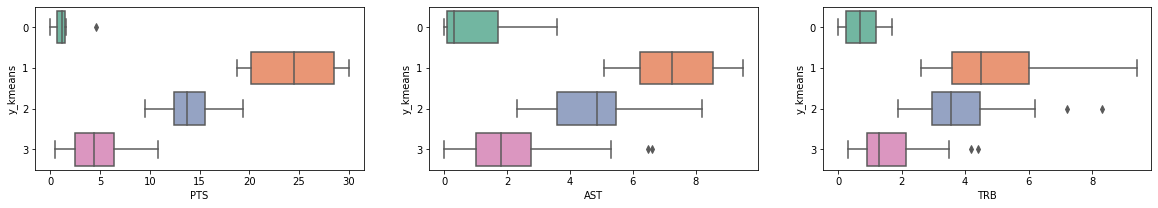

In [26]:
fig, axes = plt.subplots(figsize = (20,3))
####### PTS, AST, TRB, BLK, STL######
plt.subplot(1,3,1)
sns.boxplot(x = "PTS", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")
plt.subplot(1,3,2)
sns.boxplot(x = "AST", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")
plt.subplot(1,3,3)
sns.boxplot(x = "TRB", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")

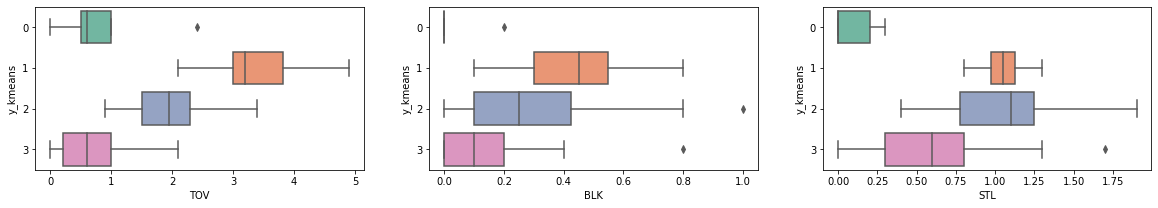

In [27]:
fig, axes = plt.subplots(figsize = (20,3))
####### PTS, AST, TRB, BLK, STL######
plt.subplot(1,3,1)
sns.boxplot(x = "TOV", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")
plt.subplot(1,3,2)
sns.boxplot(x = "BLK", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")
plt.subplot(1,3,3)
sns.boxplot(x = "STL", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")

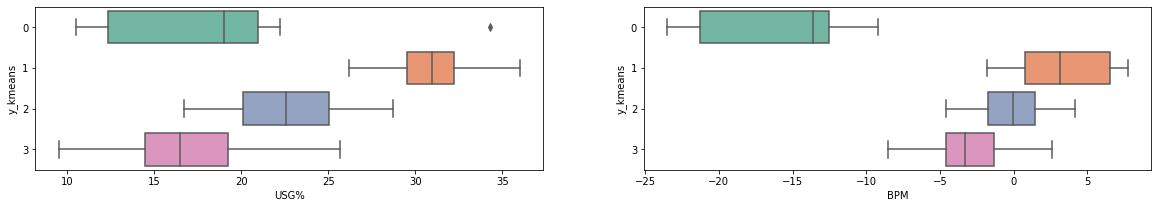

In [28]:
fig, axes = plt.subplots(figsize = (20,3))
####### USG%, BPM ######
plt.subplot(1,2,1)
sns.boxplot(x = "USG%", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")
plt.subplot(1,2,2)
sns.boxplot(x = "BPM", y = "y_kmeans", data = kmc_df, orient = "h", palette="Set2")

### Hierarchy Clustering

In [29]:
from sklearn.preprocessing import normalize
n2_df = df[['PTS','AST','TRB','TOV','BLK','STL','USG%','BPM']]
n2_df.head()

,PTS,AST,TRB,TOV,BLK,STL,USG%,BPM
0,0.3,0.3,0.5,0.0,0.0,0.0,19.7,-20.9
1,11.0,3.8,4.4,2.0,0.4,0.7,22.0,-4.1
2,2.5,1.5,2.0,0.2,0.0,0.3,11.2,-1.6
3,5.9,3.0,1.2,0.8,0.0,0.5,15.3,-2.2
4,14.6,6.1,6.2,2.7,0.4,1.5,24.8,2.8


In [30]:
#normalize the data
from sklearn import preprocessing
normalized = preprocessing.normalize(n2_df)
d_norm = pd.DataFrame(normalized, columns = n2_df.columns)
d_norm.head()

,PTS,AST,TRB,TOV,BLK,STL,USG%,BPM
0,0.010443,0.010443,0.017404,0.000000,0.000000,0.000000,0.685729,-0.727499
1,0.428090,0.147886,0.171236,0.077835,0.015567,0.027242,0.856180,-0.159561
2,0.210815,0.126489,0.168652,0.016865,0.000000,0.025298,0.944450,-0.134921
3,0.349443,0.177683,0.071073,0.047382,0.000000,0.029614,0.906183,-0.130301
4,0.480985,0.200959,0.204254,0.088949,0.013178,0.049416,0.817015,0.092244


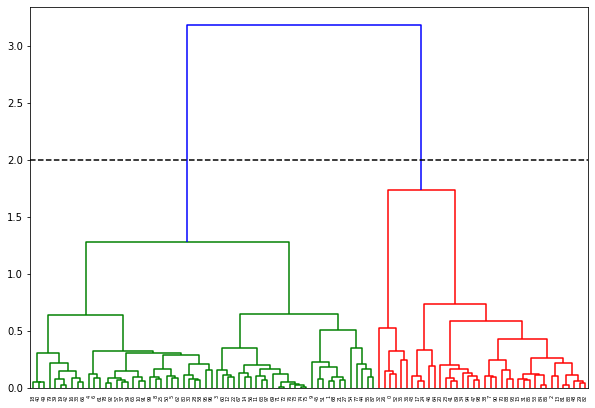

In [31]:
#performing the hierarchy clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,7))
hier = shc.dendrogram(shc.linkage(d_norm, method = 'ward'))
plt.axhline(y=2, color = 'black',linestyle= '--')

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'ward')
cluster.fit_predict(d_norm)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)